<a href="https://colab.research.google.com/github/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_03_2_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T81-558: Applications of Deep Neural Networks
**Module 3: Introduction to TensorFlow**
* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).

# Module 3 Material

* Part 3.1: Deep Learning and Neural Network Introduction [[Video]](https://www.youtube.com/watch?v=zYnI4iWRmpc&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_03_1_neural_net.ipynb)
* **Part 3.2: Introduction to Tensorflow and Keras** [[Video]](https://www.youtube.com/watch?v=PsE73jk55cE&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_03_2_keras.ipynb)
* Part 3.3: Saving and Loading a Keras Neural Network [[Video]](https://www.youtube.com/watch?v=-9QfbGM1qGw&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_03_3_save_load.ipynb)
* Part 3.4: Early Stopping in Keras to Prevent Overfitting [[Video]](https://www.youtube.com/watch?v=m1LNunuI2fk&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_03_4_early_stop.ipynb)
* Part 3.5: Extracting Weights and Manual Calculation [[Video]](https://www.youtube.com/watch?v=7PWgx16kH8s&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_03_5_weights.ipynb)

# Google CoLab Instructions

The following code ensures that Google CoLab is running the correct version of TensorFlow.

In [1]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: not using Google CoLab


# Part 3.2: Introduction to Tensorflow and Keras

![TensorFlow](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/class_2_tensorflow.png "TensorFlow")

TensorFlow is an open source software library for machine learning in various kinds of perceptual and language understanding tasks. It is currently used for both research and production by different teams in many commercial Google products, such as speech recognition, Gmail, Google Photos, and search, many of which had previously used its predecessor DistBelief. TensorFlow was originally developed by the Google Brain team for Google's research and production purposes and later released under the Apache 2.0 open source license on November 9, 2015.

* [TensorFlow Homepage](https://www.tensorflow.org/)
* [TensorFlow GitHib](https://github.com/tensorflow/tensorflow)
* [TensorFlow Google Groups Support](https://groups.google.com/forum/#!forum/tensorflow)
* [TensorFlow Google Groups Developer Discussion](https://groups.google.com/a/tensorflow.org/forum/#!forum/discuss)
* [TensorFlow FAQ](https://www.tensorflow.org/resources/faq)


### What version of TensorFlow do you have?

TensorFlow is very new and changing rapidly.  It is very important that you run the same version of it that I am using.  For this semester we will use a specific version of TensorFlow (mentioned in the last class notes).

![Self Driving Car](http://imgc-cn.artprintimages.com/images/P-473-488-90/94/9475/CFB6500Z/posters/paul-noth-does-your-car-have-any-idea-why-my-car-pulled-it-over-new-yorker-cartoon.jpg)

[Wrong version of TensorFlow?](https://twitter.com/reza_zadeh/status/849160032608440320)

In [2]:
import tensorflow as tf
print("Tensor Flow Version: {}".format(tf.__version__))

Tensor Flow Version: 2.0.0


### Installing TensorFlow

* [Google CoLab](https://colab.research.google.com/) - All platforms, use your browser (includes a GPU).
* Windows - Supported platform.
* Mac - Supported platform.
* Linux - Supported platform.

### Why TensorFlow

* Supported by Google
* Works well on Linux/Mac
* Excellent GPU support
* Python is an easy to learn programming language
* Python is [extremely popular](http://www.kdnuggets.com/2014/08/four-main-languages-analytics-data-mining-data-science.html) in the data science community

### Other Deep Learning Tools
TensorFlow is not the only only game in town.  These are some of the best supported alternatives.  Most of these are written in C++. In order of my own preference (ordered in my own estimation of approximate importance):

* [TensorFlow](https://www.tensorflow.org/) Google's deep learning API.  The focus of this class, along with Keras.
* [MXNet](https://mxnet.incubator.apache.org/) Apache foundation's deep learning API. Can be used through Keras.
* [Theano](http://deeplearning.net/software/theano/) - Python, from the academics that created deep learning.
* [Keras](https://keras.io/) - Also by Google, higher level framework that allows the use of TensorFlow, MXNet and Theano interchangeably.
[Torch](http://torch.ch/) is used by Google DeepMind, the Facebook AI Research Group, IBM, Yandex and the Idiap Research Institute.  It has been used for some of the most advanced deep learning projects in the world.  However, it requires the [LUA](https://en.wikipedia.org/wiki/Lua_(programming_language)) programming language.  It is very advanced, but it is not mainstream.  I have not worked with Torch (yet!).
* [PaddlePaddle](https://github.com/baidu/Paddle) - [Baidu](http://www.baidu.com/)'s deep learning API.
* [Deeplearning4J](http://deeplearning4j.org/) - Java based. Supports all major platforms. GPU support in Java!
* [Computational Network Toolkit (CNTK)](https://github.com/Microsoft/CNTK) - Microsoft.  Support for Windows/Linux, command line only.  Bindings for predictions for C#/Python. GPU support.
* [H2O](http://www.h2o.ai/) - Java based.  Supports all major platforms.  Limited support for computer vision. No GPU support.



### Using TensorFlow

TensorFlow is a low-level mathematics API, similar to [Numpy](http://www.numpy.org/).  However, unlike Numpy, TensorFlow is built for deep learning.  TensorFlow works by allowing you to define compute graphs with Python.  In this regard, it is similar to [Spark](http://spark.apache.org/).  TensorFlow compiles these compute graphs into highly efficient C++/[CUDA](https://en.wikipedia.org/wiki/CUDA) code.

The [TensorBoard](https://www.tensorflow.org/versions/r0.10/how_tos/summaries_and_tensorboard/index.html) command line utility can be used to view these graphs.  The iris neural network's graph used in this class is shown here:

![Iris Graph](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/class_2_graph_tf.png "Iris Graph")

Expanding the DNN gives:


![Iris DNN Graph](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/class_2_graph_dnn.png "Iris DNN Graph")


### Using TensorFlow Directly

Most of the time in the course we will communicate with TensorFlow using Keras, which allows you to specify the number of hidden layers and simply create the neural network.  

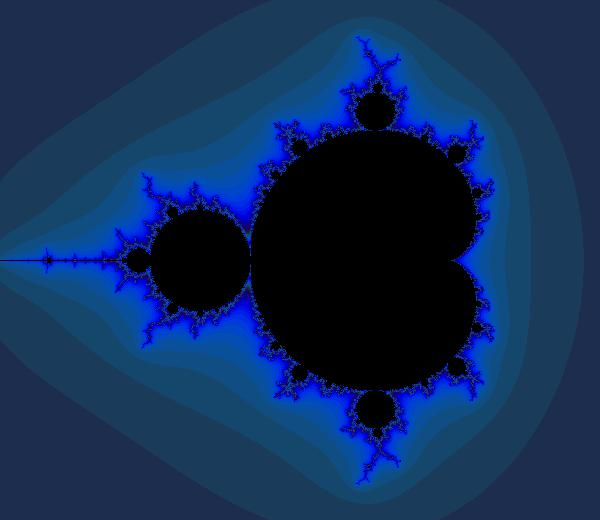

In [3]:
# Import libraries for simulation
import tensorflow as tf
import numpy as np

# Imports for visualization
import PIL.Image
from io import BytesIO
from IPython.display import Image, display

def DisplayFractal(a, fmt='jpeg'):
  """Display an array of iteration counts as a
     colorful picture of a fractal."""
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
                        30+50*np.sin(a_cyclic),
                        155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  f = BytesIO()
  PIL.Image.fromarray(a).save(f, fmt)
  display(Image(data=f.getvalue()))

# Use NumPy to create a 2D array of complex numbers

Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
Z = X+1j*Y

xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs, tf.float32))



# Operation to update the zs and the iteration count.
#
# Note: We keep computing zs after they diverge! This
#       is very wasteful! There are better, if a little
#       less simple, ways to do this.
#
for i in range(200):
    # Compute the new values of z: z^2 + x
    zs_ = zs*zs + xs

    # Have we diverged with this new value?
    not_diverged = tf.abs(zs_) < 4

    zs.assign(zs_),
    ns.assign_add(tf.cast(not_diverged, tf.float32))
    
DisplayFractal(ns.numpy())

In [4]:
import tensorflow as tf

# Create a Constant op that produces a 1x2 matrix.  The op is
# added as a node to the default graph.
#
# The value returned by the constructor represents the output
# of the Constant op.
matrix1 = tf.constant([[3., 3.]])

# Create another Constant that produces a 2x1 matrix.
matrix2 = tf.constant([[2.],[2.]])

# Create a Matmul op that takes 'matrix1' and 'matrix2' as inputs.
# The returned value, 'product', represents the result of the matrix
# multiplication.
product = tf.matmul(matrix1, matrix2)

print(product)
print(float(product))

tf.Tensor([[12.]], shape=(1, 1), dtype=float32)
12.0


In [5]:
# Enter an interactive TensorFlow Session.
import tensorflow as tf

x = tf.Variable([1.0, 2.0])
a = tf.constant([3.0, 3.0])

# Add an op to subtract 'a' from 'x'.  Run it and print the result
sub = tf.subtract(x, a)
print(sub)
print(sub.numpy())
# ==> [-2. -1.]

tf.Tensor([-2. -1.], shape=(2,), dtype=float32)
[-2. -1.]


In [6]:
x.assign([4.0, 6.0])

<tf.Variable 'UnreadVariable' shape=(2,) dtype=float32, numpy=array([4., 6.], dtype=float32)>

In [7]:
sub = tf.subtract(x, a)
print(sub)
print(sub.numpy())

tf.Tensor([1. 3.], shape=(2,), dtype=float32)
[1. 3.]


### Introduction to Keras

[Keras](https://keras.io/) is a layer on top of Tensorflow that makes it much easier to create neural networks.  Rather than define the graphs, like you see above, you define the individual layers of the network with a much more high level API.  Unless you are performing research into entirely new structures of deep neural networks it is unlikely that you need to program TensorFlow directly.  

**For this class, we will use usually use TensorFlow through Keras, rather than direct TensorFlow**

Keras is a separate install from TensorFlow.  To install Keras, use **pip install keras** after **pip install tensorflow**.

### Simple TensorFlow Regression: MPG

This example shows how to encode the MPG dataset for regression.  This is slightly more complex than Iris, because:

* Input has both numeric and categorical
* Input has missing values

This example uses functions defined above in this notepad, the "helpful functions". These functions allow you to build the feature vector for a neural network. Consider the following:

* Predictors/Inputs 
    * Fill any missing inputs with the median for that column.  Use **missing_median**.
    * Encode textual/categorical values with **encode_text_dummy**.
    * Encode numeric values with **encode_numeric_zscore**.
* Output
    * Discard rows with missing outputs.
    * Encode textual/categorical values with **encode_text_index**.
    * Do not encode output numeric values.
* Produce final feature vectors (x) and expected output (y) with **to_xy**.

To encode categorical values that are part of the feature vector, use the functions from above.  If the categorical value is the target (as was the case with Iris, use the same technique as Iris). The iris technique allows you to decode back to Iris text strings from the predictions.

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/auto-mpg.csv", 
    na_values=['NA', '?'])

cars = df['name']

# Handle missing value
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

# Pandas to Numpy
x = df[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']].values
y = df['mpg'].values # regression

# Build the neural network
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(10, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x,y,verbose=2,epochs=100)

Train on 398 samples
Epoch 1/100
398/398 - 1s - loss: 451.0939
Epoch 2/100
398/398 - 0s - loss: 169.9040
Epoch 3/100
398/398 - 0s - loss: 147.6547
Epoch 4/100
398/398 - 0s - loss: 130.4363
Epoch 5/100
398/398 - 0s - loss: 120.0428
Epoch 6/100
398/398 - 0s - loss: 112.3975
Epoch 7/100
398/398 - 0s - loss: 110.2450
Epoch 8/100
398/398 - 0s - loss: 110.8281
Epoch 9/100
398/398 - 0s - loss: 100.5697
Epoch 10/100
398/398 - 0s - loss: 93.0300
Epoch 11/100
398/398 - 0s - loss: 91.2283
Epoch 12/100
398/398 - 0s - loss: 82.8229
Epoch 13/100
398/398 - 0s - loss: 80.6588
Epoch 14/100
398/398 - 0s - loss: 75.4649
Epoch 15/100
398/398 - 0s - loss: 71.0691
Epoch 16/100
398/398 - 0s - loss: 68.4286
Epoch 17/100
398/398 - 0s - loss: 66.8159
Epoch 18/100
398/398 - 0s - loss: 62.2833
Epoch 19/100
398/398 - 0s - loss: 58.0148
Epoch 20/100
398/398 - 0s - loss: 55.8333
Epoch 21/100
398/398 - 0s - loss: 53.6490
Epoch 22/100
398/398 - 0s - loss: 51.5476
Epoch 23/100
398/398 - 0s - loss: 49.9140
Epoch 24/100


### Introduction to Neural Network Hyperparameters

If you look at the above code you will see that the neural network is made up of 4 layers.  The first layer is the input layer.  This is specified by **input_dim** and it is set to be the number of inputs that the dataset has.  One input neuron is needed for ever input (including dummy variables).  However, there are also several hidden layers, with 25 and 10 neurons each. You might be wondering how these numbers were chosen?  This is one of the most common questions about neural networks.  Unfortunately, there is not a good answer.  These are hyperparameters.  They are settings that can affect neural network performance, yet there is not a clearly defined means of setting them.

In general, more hidden neurons mean more capability to fit to complex problems.  However, too many neurons can lead to overfitting and lengthy training times.  Too few can lead to underfitting the problem and will sacrifice accuracy.  Also, how many layers you have is another hyperparameter.  In general, more layers allow the neural network to be able to perform more of its own feature engineering and data preprocessing.  But this also comes at the expense of training times and risk of overfitting.  In general, you will see that neuron counts start out larger near the input layer and tend to shrink towards the output layer in a sort of triangular fashion. 

There are techniques that use machine learning to optimize these values.  These will be discussed in [Module 8.3](t81_558_class_08_3_keras_hyperparameters.ipynb).

### Controlling the Amount of Output

One line is produced for each training epoch.  You can eliminate this output by setting the verbose setting of the fit command:

* **verbose=0** - No progress output (use with Juputer if you do not want output)
* **verbose=1** - Display progress bar, does not work well with Jupyter
* **verbose=2** - Summary progress output (use with Jupyter if you want to know the loss at each epoch)

### Regression Prediction

Next, we will perform actual predictions.  These predictions are assigned to the **pred** variable. These are all MPG predictions from the neural network.  Notice that this is a 2D array?  You can always see the dimensions of what is returned by printing out **pred.shape**.  Neural networks can return multiple values, so the result is always an array.  Here the neural network only returns 1 value per prediction (there are 398 cars, so 398 predictions).  However, a 2D array is needed because the neural network has the potential of returning more than one value.   

In [9]:
pred = model.predict(x)
print("Shape: {}".format(pred.shape))
print(pred)

Shape: (398, 1)
[[14.390662 ]
 [14.292335 ]
 [15.508216 ]
 [16.497688 ]
 [15.40821  ]
 [10.367469 ]
 [10.617591 ]
 [11.007239 ]
 [10.962989 ]
 [13.115668 ]
 [12.98722  ]
 [14.003058 ]
 [ 9.598975 ]
 [15.1698675]
 [26.876045 ]
 [20.194618 ]
 [20.495552 ]
 [20.095375 ]
 [27.834633 ]
 [26.000862 ]
 [25.57331  ]
 [26.17234  ]
 [27.52909  ]
 [27.585793 ]
 [20.193062 ]
 [15.613624 ]
 [18.24308  ]
 [18.17234  ]
 [17.376686 ]
 [28.225716 ]
 [25.100746 ]
 [27.524055 ]
 [29.123909 ]
 [19.245857 ]
 [18.026863 ]
 [16.54264  ]
 [15.59806  ]
 [17.680061 ]
 [13.16001  ]
 [10.317359 ]
 [12.540809 ]
 [14.216895 ]
 [10.156287 ]
 [ 9.100135 ]
 [ 8.291297 ]
 [17.714119 ]
 [23.788612 ]
 [16.592476 ]
 [15.914496 ]
 [25.61103  ]
 [26.926033 ]
 [28.513176 ]
 [27.573952 ]
 [29.711205 ]
 [30.305428 ]
 [27.30288  ]
 [28.079308 ]
 [28.05149  ]
 [27.742378 ]
 [26.739845 ]
 [25.821877 ]
 [26.472328 ]
 [13.347022 ]
 [11.054542 ]
 [14.583289 ]
 [12.912635 ]
 [16.431435 ]
 [11.285865 ]
 [12.066199 ]
 [12.639686 ]
 [12

We would like to see how good these predictions are.  We know what the correct MPG is for each car, so we can measure how close the neural network was.

In [10]:
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y))
print(f"Final score (RMSE): {score}")

Final score (RMSE): 4.148288375456488


This means that, on average the predictions were within +/- 5.89 values of the correct value.  This is not very good, but we will soon see how to improve it.

We can also print out the first 10 cars, with predictions and actual MPG.

In [11]:
# Sample predictions
for i in range(10):
    print(f"{i+1}. Car name: {cars[i]}, MPG: {y[i]}, predicted MPG: {pred[i]}")

1. Car name: chevrolet chevelle malibu, MPG: 18.0, predicted MPG: [14.390662]
2. Car name: buick skylark 320, MPG: 15.0, predicted MPG: [14.292335]
3. Car name: plymouth satellite, MPG: 18.0, predicted MPG: [15.508216]
4. Car name: amc rebel sst, MPG: 16.0, predicted MPG: [16.497688]
5. Car name: ford torino, MPG: 17.0, predicted MPG: [15.40821]
6. Car name: ford galaxie 500, MPG: 15.0, predicted MPG: [10.367469]
7. Car name: chevrolet impala, MPG: 14.0, predicted MPG: [10.617591]
8. Car name: plymouth fury iii, MPG: 14.0, predicted MPG: [11.007239]
9. Car name: pontiac catalina, MPG: 14.0, predicted MPG: [10.962989]
10. Car name: amc ambassador dpl, MPG: 15.0, predicted MPG: [13.115668]


### Simple TensorFlow Classification: Iris

This is a very simple example of how to perform the Iris classification using TensorFlow.  The iris.csv file is used, rather than using the built-in files that many of the Google examples require.  

**Make sure that you always run previous code blocks.  If you run the code block below, without the codeblock above, you will get errors**

In [12]:
import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/iris.csv", 
    na_values=['NA', '?'])

# Convert to numpy - Classification
x = df[['sepal_l', 'sepal_w', 'petal_l', 'petal_w']].values
dummies = pd.get_dummies(df['species']) # Classification
species = dummies.columns
y = dummies.values


# Build neural network
model = Sequential()
model.add(Dense(50, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(25, activation='relu')) # Hidden 2
model.add(Dense(y.shape[1],activation='softmax')) # Output

model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(x,y,verbose=2,epochs=100)

Train on 150 samples
Epoch 1/100
150/150 - 1s - loss: 0.9697
Epoch 2/100
150/150 - 0s - loss: 0.8672
Epoch 3/100
150/150 - 0s - loss: 0.7989
Epoch 4/100
150/150 - 0s - loss: 0.7582
Epoch 5/100
150/150 - 0s - loss: 0.7161
Epoch 6/100
150/150 - 0s - loss: 0.6793
Epoch 7/100
150/150 - 0s - loss: 0.6448
Epoch 8/100
150/150 - 0s - loss: 0.6115
Epoch 9/100
150/150 - 0s - loss: 0.5819
Epoch 10/100
150/150 - 0s - loss: 0.5554
Epoch 11/100
150/150 - 0s - loss: 0.5295
Epoch 12/100
150/150 - 0s - loss: 0.5044
Epoch 13/100
150/150 - 0s - loss: 0.4821
Epoch 14/100
150/150 - 0s - loss: 0.4636
Epoch 15/100
150/150 - 0s - loss: 0.4450
Epoch 16/100
150/150 - 0s - loss: 0.4282
Epoch 17/100
150/150 - 0s - loss: 0.4123
Epoch 18/100
150/150 - 0s - loss: 0.3994
Epoch 19/100
150/150 - 0s - loss: 0.3854
Epoch 20/100
150/150 - 0s - loss: 0.3724
Epoch 21/100
150/150 - 0s - loss: 0.3624
Epoch 22/100
150/150 - 0s - loss: 0.3483
Epoch 23/100
150/150 - 0s - loss: 0.3387
Epoch 24/100
150/150 - 0s - loss: 0.3254
Epoc

In [13]:
# Print out number of species found:

print(species)

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')


Now that you have a neural network trained, we would like to be able to use it. The following code makes use of our neural network. Exactly like before, we will generate predictions.  Notice that 3 values come back for each of the 150 iris flowers.  There were 3 types of iris (Iris-setosa, Iris-versicolor, and Iris-virginica).  

In [14]:
pred = model.predict(x)
print("Shape: {pred.shape}")
print(pred)

Shape: {pred.shape}
[[9.97803628e-01 2.19636527e-03 3.15674958e-10]
 [9.95171249e-01 4.82870825e-03 2.72401635e-09]
 [9.96381223e-01 3.61878541e-03 1.68265046e-09]
 [9.93011296e-01 6.98864833e-03 6.66026612e-09]
 [9.97854292e-01 2.14564498e-03 3.05058062e-10]
 [9.96514142e-01 3.48593434e-03 3.64354269e-10]
 [9.94918764e-01 5.08119352e-03 2.94717273e-09]
 [9.96609688e-01 3.39028845e-03 8.45293335e-10]
 [9.91480827e-01 8.51911586e-03 1.48466883e-08]
 [9.95911241e-01 4.08877851e-03 1.70896475e-09]
 [9.98355806e-01 1.64413138e-03 1.07293466e-10]
 [9.94890571e-01 5.10939537e-03 2.18607576e-09]
 [9.95968103e-01 4.03186679e-03 2.09606044e-09]
 [9.96716440e-01 3.28350184e-03 2.63777267e-09]
 [9.99593318e-01 4.06734936e-04 4.22363360e-12]
 [9.99084949e-01 9.15081764e-04 1.44664307e-11]
 [9.98612523e-01 1.38745771e-03 7.40323497e-11]
 [9.97162879e-01 2.83708563e-03 5.30569477e-10]
 [9.97710228e-01 2.28978368e-03 1.27924019e-10]
 [9.97498810e-01 2.50116806e-03 3.05275305e-10]
 [9.96230543e-01 3.7

In [15]:
# If you would like to turn of scientific notation, the following line can be used:
np.set_printoptions(suppress=True)

In [16]:
# The to_xy function represented the input in the same way.  Each row has only 1.0 value because each row is only one type
# of iris.  This is the training data, we KNOW what type of iris it is.  This is called one-hot encoding.  Only one value
# is 1.0 (hot)
print(y[0:10])

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [17]:
# Usually the column (pred) with the highest prediction is considered to be the prediction of the neural network.  It is easy
# to convert the predictions to the expected iris species.  The argmax function finds the index of the maximum prediction
# for each row.
predict_classes = np.argmax(pred,axis=1)
expected_classes = np.argmax(y,axis=1)
print(f"Predictions: {predict_classes}")
print(f"Expected: {expected_classes}")

Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Expected: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [18]:
# Of course it is very easy to turn these indexes back into iris species.  We just use the species list that we created earlier.
print(species[predict_classes[1:10]])

Index(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'],
      dtype='object')


In [19]:
from sklearn.metrics import accuracy_score
# Accuracy might be a more easily understood error metric.  It is essentially a test score.  For all of the iris predictions,
# what percent were correct?  The downside is it does not consider how confident the neural network was in each prediction.
correct = accuracy_score(expected_classes,predict_classes)
print(f"Accuracy: {correct}")

Accuracy: 0.98


The code below performs two ad hoc predictions.  The first prediction is simply a single iris flower.  The second predicts two iris flowers.  Notice that the argmax in the second prediction requires **axis=1**?  Since we have a 2D array now, we must specify which axis to take the argmax over.  The value **axis=1** specifies we want the max column index for each row.

In [20]:
# ad hoc prediction
sample_flower = np.array( [[5.0,3.0,4.0,2.0]], dtype=float)
pred = model.predict(sample_flower)
print(pred)
pred = np.argmax(pred)
print(f"Predict that {sample_flower} is: {species[pred]}")



[[0.00024024 0.17223348 0.8275264 ]]
Predict that [[5. 3. 4. 2.]] is: Iris-virginica


In [21]:
# predict two sample flowers
sample_flower = np.array( [[5.0,3.0,4.0,2.0],[5.2,3.5,1.5,0.8]], dtype=float)
pred = model.predict(sample_flower)
print(pred)
pred = np.argmax(pred,axis=1)
print(f"Predict that these two flowers {sample_flower} are: {species[pred]}")

[[0.00024024 0.17223357 0.8275262 ]
 [0.9863484  0.01365156 0.00000001]]
Predict that these two flowers [[5.  3.  4.  2. ]
 [5.2 3.5 1.5 0.8]] are: Index(['Iris-virginica', 'Iris-setosa'], dtype='object')
